In [1]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime

sns.set()

### References ###
* [Google Trends - Medium](https://medium.com/intro-to-python-wows/google-trends-4db836214868)

In [2]:
pytrend = TrendReq(hl='en-US', tz=360, retries=10000, backoff_factor=0.5)

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
# kw_list=['柯文哲','蔡英文','韓國瑜','郭台銘','假新聞']
kw_list=['國民黨','民進黨','台灣民眾黨','親民黨','時代力量']
# pytrend.build_payload(kw_list, timeframe = 'all')
# pytrend.build_payload(kw_list, timeframe = '2010-10-01 2019-01-01')
pytrend.build_payload(kw_list, timeframe = '2018-08-01 2019-12-31')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
# interest_over_time_df = pytrend.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, year_end=2019, month_end=12, day_end=31, cat=0, geo='', gprop='', sleep=0)
# col_names = ['Wen-Je Ko','Ing-Wen Tsai','Kuo-yu Han','Terry Gou','fake news']
col_names = ['KMT','DPP','TPP','PFP','NPP']
for iname in range(len(col_names)):
    interest_over_time_df.rename(columns={interest_over_time_df.columns[iname]: col_names[iname]}, inplace=True)
        

interest_over_time_df.drop('isPartial', axis=1, inplace=True)
interest_over_time_df.head()


KMT  DPP  TPP  PFP  NPP
date                               
2018-08-05    8    7    0    0    1
2018-08-12    7    7    0    0    2
2018-08-19    8    7    0    0    2
2018-08-26   10    5    0    0    1
2018-09-02    6    6    0    0    1

In [6]:
related_queries_dict = pytrend.related_queries()
related_queries_dict['國民黨']

{'top':               query  value
 0          不 分區 國民黨    100
 1       國民黨 不 分區 名單     73
 2            中國 國民黨     64
 3        國民黨 初 選 結果     56
 4            國民黨 總統     55
 5              韓國 瑜     53
 6          韓國 瑜 國民黨     52
 7      國民黨 不 分區 立 委     41
 8            台灣 國民黨     41
 9          不 分區 立 委     41
 10       國民黨 立 委 名單     35
 11       國民黨 總統 初 選     33
 12          國民黨 ptt     31
 13           國民黨 主席     28
 14         國民黨 候選 人     28
 15  國民黨 立 委 不 分區 名單     26
 16           國民黨 英文     21
 17          郭台銘 國民黨     18
 18      國民黨 政見 發表 會     18
 19              郭台銘     17
 20               新聞     15
 21          政見 發表 會     15
 22       高雄 國民黨 黨 部     15
 23              共產黨     14
 24       國民黨 立 委 提名     14, 'rising':                    query  value
 0             國民黨 初 選 時間  79550
 1             國民黨 民 調 時間  59400
 2         國民黨 初 選 民 調 時間  51250
 3         國民黨 總統 初 選 民 調  38700
 4        國民黨 不 分區 立 委 提名  34600
 5              國民黨 和平 協議  32100
 6       國民黨 不 分區 名單 202

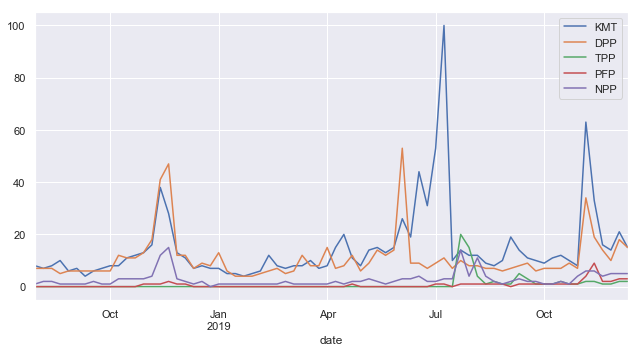

In [4]:
interest_over_time_df.plot(figsize=(9,5))
plt.tight_layout()

In [7]:
### one simple way to visualize correlation matrix from dataframe
corr = interest_over_time_df.corr()
corr.style.background_gradient(cmap='coolwarm')

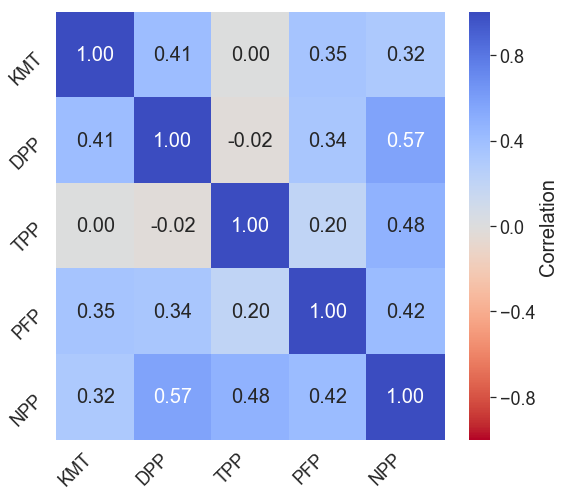

In [5]:
f, ax = plt.subplots(figsize=(8, 7))
corr = interest_over_time_df.corr()
ax = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 20},
            xticklabels=interest_over_time_df.columns,
            yticklabels=interest_over_time_df.columns,
            cmap="coolwarm_r",
            vmin=-1.0,
            vmax=1.0)
ax.set_xlabel('',fontsize=21)
ax.set_ylabel('', fontsize=21)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('Correlation',size=20)

plt.tight_layout()


In [171]:
kw_list=['鴻海','鴻海股價','富士康','郭台銘','股票']
# pytrend.build_payload(kw_list, timeframe = 'all')
# pytrend.build_payload(kw_list, timeframe = '2010-10-01 2019-01-01')
pytrend.build_payload(kw_list, timeframe = '2015-01-01 2019-12-31')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
# interest_over_time_df = pytrend.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, year_end=2019, month_end=12, day_end=31, cat=0, geo='', gprop='', sleep=0)
col_names = ['Google search: Foxconn Technology Group','Google search: Foxconn Technology Group stock price','Google search: Foxconn','Google search: Terry Gou','Google search: Stock']
for iname in range(len(col_names)):
    interest_over_time_df.rename(columns={interest_over_time_df.columns[iname]: col_names[iname]}, inplace=True)
        

interest_over_time_df.drop('isPartial', axis=1, inplace=True)

(interest_over_time_df.style
     .background_gradient('Reds',subset='Google search: Foxconn Technology Group')
     .background_gradient('Reds',subset='Google search: Foxconn Technology Group stock price')
     .background_gradient('Reds',subset='Google search: Foxconn')
     .background_gradient('Reds',subset='Google search: Terry Gou')
     .background_gradient('Reds',subset='Google search: Stock')
     # .background_gradient('Greens', subset='Google search: Stock')
     .highlight_null()
)



In [173]:
f, ax = plt.subplots(figsize=(12, 10))
corr = interest_over_time_df.corr()
ax = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 20},
            xticklabels=interest_over_time_df.columns,
            yticklabels=interest_over_time_df.columns,
            cmap="coolwarm_r",
            vmin=-1.0,
            vmax=1.0)
ax.set_xlabel('',fontsize=21)
ax.set_ylabel('', fontsize=21)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=270, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('Correlation',size=20)

plt.tight_layout()


In [174]:
start = datetime(2015, 1, 1)
df = web.DataReader('2317.TW', 'yahoo', start)
df.head()


High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-05  95.021698  94.047600  95.021698  94.372299  23308824.0  79.629990
2015-01-06  93.073601  91.450203  93.073601  91.450203  60587604.0  77.164368
2015-01-07  92.857101  91.233803  91.233803  92.207802  31148964.0  77.803619
2015-01-08  94.155800  92.748901  92.965401  94.047600  28348320.0  79.356010
2015-01-09  95.021698  93.614700  94.480499  93.614700  20894412.0  78.990738

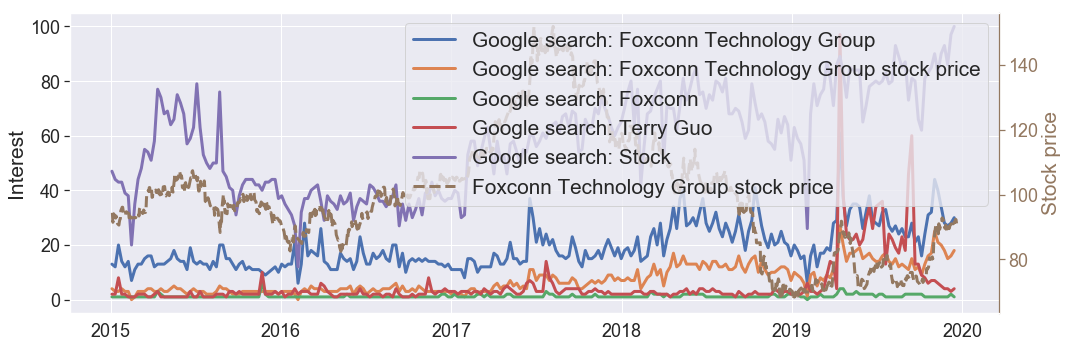

In [176]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)

ax1.plot(interest_over_time_df.index, interest_over_time_df[interest_over_time_df.columns[0]], label='Google search: Foxconn Technology Group', linewidth=3)
ax1.plot(interest_over_time_df.index, interest_over_time_df[interest_over_time_df.columns[1]], label='Google search: Foxconn Technology Group stock price', linewidth=3)
ax1.plot(interest_over_time_df.index, interest_over_time_df[interest_over_time_df.columns[2]], label='Google search: Foxconn', linewidth=3)
ax1.plot(interest_over_time_df.index, interest_over_time_df[interest_over_time_df.columns[3]], label='Google search: Terry Guo', linewidth=3)
ax1.plot(interest_over_time_df.index, interest_over_time_df[interest_over_time_df.columns[4]], label='Google search: Stock', linewidth=3)
ax1.set_ylabel('Interest', fontsize=21)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
# ax1.set_title('Company: '+company,fontsize = 32)

ax2 = ax1.twinx()
color='C5'
ax2.plot(df.index, df['Close'], label='Foxconn Technology Group stock price', linewidth=3, color=color,linestyle='--')
ax2.tick_params(axis='y', labelsize=18, labelcolor=color, colors=color)
ax2.set_ylabel('Stock price', fontsize=21, color=color)
ax2.spines['right'].set_color(color)

plt.grid(False)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc='best',fontsize='xx-large')

plt.tight_layout()